## Credit Risk Modeling

In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.tracebacklimit = 0 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

## Data Cleaning

In [2]:
df = pd.read_csv('accepted.csv')

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74805/1686102350.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted.csv')


In [8]:
keep_cols = [
    # Loan info
    "loan_amnt", "term", "int_rate", "installment", "purpose",
    
    # Borrower demographics
    "emp_length", "home_ownership", "annual_inc", "verification_status",
    
    # Credit history
    "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", 
    "pub_rec", "revol_bal", "revol_util", "total_acc", "earliest_cr_line",
    
    # Lender grade
    "grade", "sub_grade",
    
    # Target
    "loan_status"
]

df_model = df[keep_cols].copy()
df_model = df_model.rename(columns={"annual_inc": "annual_income", "total_acc": "total_accounts", "sub_grade": "sub_grade_level", "int_rate": "interest_rate", "loan_amnt": "loan_amount", "loan_status": "loan_outcome", 
                              "emp_length": "employment_length", "delinq_2yrs": "delinquent_2yrs", "inq_last_6mths": "inquiries_last_6mths", "open_acc": "open_accounts", "pub_rec": "public_records", "revol_bal": "revolving_balance", 
                              "revol_util": "revolving_utilization", "earliest_cr_line": "earliest_credit_line", "grade": "grade_level", "term": "loan_term", "installment": "monthly_installment", 
                              "dti": "debt_to_income_ratio", "purpose": "loan_purpose", "home_ownership": "home_ownership_status", "verification_status": "income_verification_status"})

df_model.head(15)

,loan_amount,loan_term,interest_rate,monthly_installment,loan_purpose,employment_length,home_ownership_status,annual_income,income_verification_status,debt_to_income_ratio,...,inquiries_last_6mths,open_accounts,public_records,revolving_balance,revolving_utilization,total_accounts,earliest_credit_line,grade_level,sub_grade_level,loan_outcome
0,3600.0,36 months,13.99,123.03,debt_consolidation,10+ years,MORTGAGE,55000.0,Not Verified,5.91,...,1.0,7.0,0.0,2765.0,29.7,13.0,Aug-2003,C,C4,Fully Paid
1,24700.0,36 months,11.99,820.28,small_business,10+ years,MORTGAGE,65000.0,Not Verified,16.06,...,4.0,22.0,0.0,21470.0,19.2,38.0,Dec-1999,C,C1,Fully Paid
2,20000.0,60 months,10.78,432.66,home_improvement,10+ years,MORTGAGE,63000.0,Not Verified,10.78,...,0.0,6.0,0.0,7869.0,56.2,18.0,Aug-2000,B,B4,Fully Paid
3,35000.0,60 months,14.85,829.90,debt_consolidation,10+ years,MORTGAGE,110000.0,Source Verified,17.06,...,0.0,13.0,0.0,7802.0,11.6,17.0,Sep-2008,C,C5,Current
4,10400.0,60 months,22.45,289.91,major_purchase,3 years,MORTGAGE,104433.0,Source Verified,25.37,...,3.0,12.0,0.0,21929.0,64.5,35.0,Jun-1998,F,F1,Fully Paid
5,11950.0,36 months,13.44,405.18,debt_consolidation,4 years,RENT,34000.0,Source Verified,10.20,...,0.0,5.0,0.0,8822.0,68.4,6.0,Oct-1987,C,C3,Fully Paid
6,20000.0,36 months,9.17,637.58,debt_consolidation,10+ years,MORTGAGE,180000.0,Not Verified,14.67,...,0.0,12.0,0.0,87329.0,84.5,27.0,Jun-1990,B,B2,Fully Paid
7,20000.0,36 months,8.49,631.26,major_purchase,10+ years,MORTGAGE,85000.0,Not Verified,17.61,...,0.0,8.0,0.0,826.0,5.7,15.0,Feb-1999,B,B1,Fully Paid
8,10000.0,36 months,6.49,306.45,credit_card,6 years,RENT,85000.0,Not Verified,13.07,...,1.0,14.0,1.0,10464.0,34.5,23.0,Apr-2002,A,A2,Fully Paid
9,8000.0,36 months,11.48,263.74,credit_card,10+ years,MORTGAGE,42000.0,Not Verified,34.80,...,0.0,8.0,0.0,7034.0,39.1,18.0,Nov-1994,B,B5,Fully Paid


## Exploratory Data Analysis (EDA)

In [10]:
df_model['loan_outcome'].value_counts()

loan_outcome
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

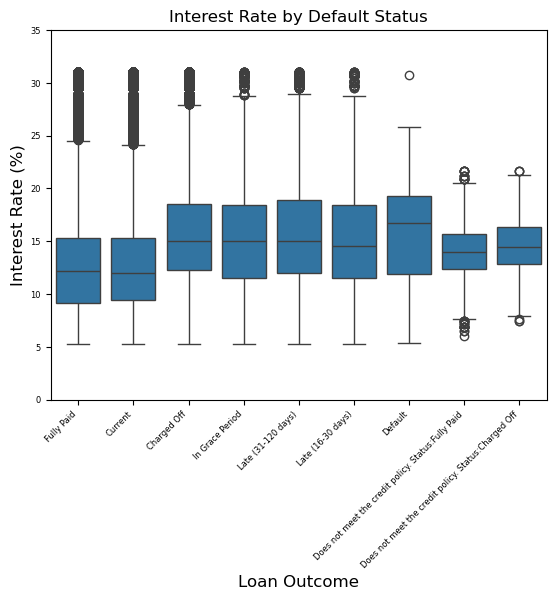

In [19]:
sns.boxplot(x="loan_outcome", y="interest_rate", data=df_model)
plt.ylim(0, 35)
plt.xticks(rotation=45, ha="right", fontsize=6)
plt.yticks(fontsize=6)
plt.title("Interest Rate by Default Status")
plt.xlabel("Loan Outcome", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.show()


## Train / Test Split

## Preprocessing

## Modeling

### Logistic Regression

### LDA

### Random Forest

### XGBOOST